In [15]:
import geopandas as gpd

In [3]:
import geopandas
df = geopandas.read_file("swiss_map.geojson")
df.head()

,id,name,geometry
0,ZH,Zürich,"POLYGON ((8.80761 47.22089, 8.79264 47.22288, ..."
1,BE,Bern/Berne,"MULTIPOLYGON (((7.82457 47.26587, 7.82457 47.2..."
2,LU,Luzern,"POLYGON ((8.04867 46.78782, 8.04685 46.78683, ..."
3,UR,Uri,"POLYGON ((8.93464 46.91997, 8.94280 46.90982, ..."
4,SZ,Schwyz,"POLYGON ((8.56900 46.98983, 8.54269 46.97988, ..."


In [4]:
import numpy as np

# get min/max bounds
min_x = df.bounds["minx"].min()
min_y = df.bounds["miny"].min()

max_x = df.bounds["maxx"].max()
max_y = df.bounds["maxy"].max()

# get the coordinates for each axis
x_coordinates = np.linspace(min_x, max_x, num=20)
y_coordinates = np.linspace(min_y, max_y, num=20)

# make the grid data
x_values, y_values = np.meshgrid(x_coordinates, y_coordinates)
coordinates = np.vstack([x_values.ravel(), y_values.ravel()]).T

<Axes: >

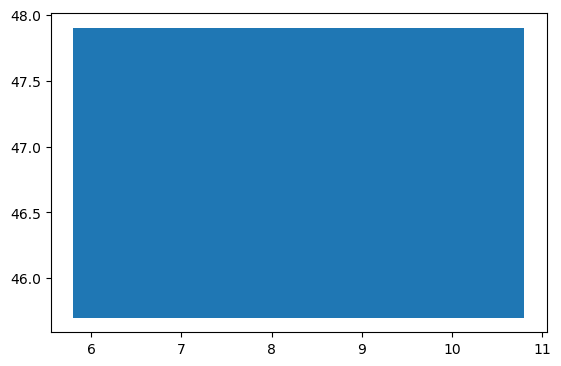

In [22]:
from shapely.geometry import Polygon

plot_min_longitude = 5.8
plot_max_longitude = 10.8
plot_min_latitude = 45.7
plot_max_latitude = 47.9

corners = [
    [plot_min_longitude, plot_min_latitude],
    [plot_max_longitude, plot_min_latitude],
    [plot_max_longitude, plot_max_latitude],
    [plot_min_longitude, plot_max_latitude]
]


plot_rectangle = Polygon(corners)
plot_rectangle_df = gpd.GeoSeries([plot_rectangle,], crs='epsg:4326')

plot_rectangle_df.plot() 

In [25]:
canton_geometries = [row[2] for _, row in df.iterrows()]

canton_series = gpd.GeoSeries(canton_geometries, crs='epsg:4326').unary_union()
canton_series.plot()

/var/folders/hd/p540nk9s5cl9tcwdzjg2flnh0000gr/T/ipykernel_73933/1819762129.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  canton_geometries = [row[2] for _, row in df.iterrows()]


GEOSException: TopologyException: side location conflict at 9.4642762884984162 47.485207025050329. This can occur if the input geometry is invalid.

/var/folders/hd/p540nk9s5cl9tcwdzjg2flnh0000gr/T/ipykernel_73933/828750997.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  geom = row[2]
/var/folders/hd/p540nk9s5cl9tcwdzjg2flnh0000gr/T/ipykernel_73933/828750997.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  geom = row[2]
/var/folders/hd/p540nk9s5cl9tcwdzjg2flnh0000gr/T/ipykernel_73933/828750997.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  geom = row[2]
/var/folders/

<Axes: >

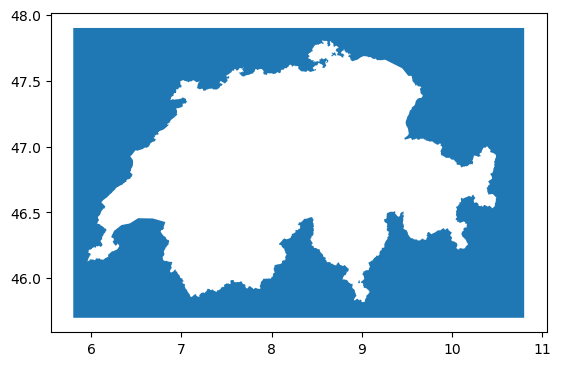

In [32]:
canton_geometries = []
for i, row in df.iterrows():
    geom = row[2]
    valid = geom.is_valid
    if valid:
        canton_geometries.append(geom)
    else:
        fixed = geom.buffer(0)
        canton_geometries.append(fixed)

switzerland_polygon = gpd.GeoSeries(canton_geometries, crs='epsg:4326').unary_union

plot_rectangle = plot_rectangle.difference(switzerland_polygon)
plot_rectangle = gpd.GeoSeries([plot_rectangle,], crs='epsg:4326')
plot_rectangle.plot()

In [83]:
import pandas as pd

transit_times_df = pd.read_csv("preliminary_times.csv")
transit_times_df["time_hours"] = transit_times_df["time"] / 3600

In [84]:
transit_times_df["time"].mean()/3600

3.7538922155688623

In [85]:
transit_times_clean = transit_times_df.copy()
transit_times_clean["time_hours"][transit_times_df["time_hours"] > 5] = 5.5

/var/folders/hd/p540nk9s5cl9tcwdzjg2flnh0000gr/T/ipykernel_73933/417249190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transit_times_clean["time_hours"][transit_times_df["time_hours"] > 5] = 5.5


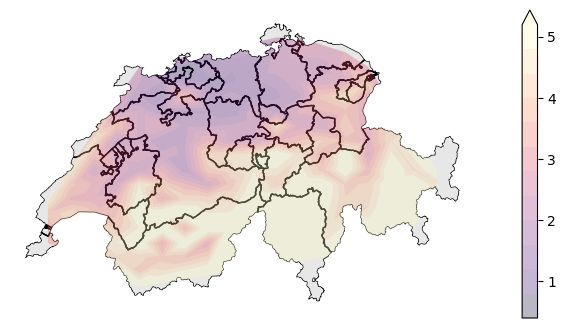

In [87]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(1, 1, figsize=(8.5, 4))

df.plot(facecolor=(0.1, 0.1, 0.1, 0.1), edgecolor="black", ax=ax)

# add the time points
# ax.scatter(
#     x=transit_times_df['longitude'],
#     y=transit_times_df['latitude'],
#     c=transit_times_df['time'],
#     vmin=0,
#     vmax=5
# )

# ax.tricontour(
#     transit_times_df['longitude'],
#     transit_times_df['latitude'],
#     transit_times_df['time'],
#     levels=14,
#     linewidths=0.5,
#     colors='k'
# )
cntr_f = ax.tricontourf(
    transit_times_clean['longitude'],
    transit_times_clean['latitude'],
    transit_times_clean['time_hours'],
    levels=14,
    cmap="magma",
    antialiased=True,
    alpha=0.3,
    vmin=0,
    vmax=5,
    zorder=1,
    extend="max"
)

plot_rectangle.plot(
    facecolor=(1, 1, 1),
    edgecolor="none",
    ax=ax,
    zorder=1000,
)

ax.set_xlim((5.8, 10.8))
ax.set_ylim((45.7, 47.9))
bounds = [1, 2, 3, 4, 5]
f.colorbar(cntr_f, ax=ax, ticks=bounds)
ax.set_axis_off();

f.savefig("test.pdf", bbox_inches="tight")

1.0166666666666666

In [23]:
# import plotly.express as px

# fig = px.choropleth_mapbox(df, geojson=jdata, 
#           featureidkey='properties.id',
#           locations='canton-id',
#           color='2018',
#         color_continuous_scale  ='algae_r',      
                          
#           zoom=5.5,
#           center={'lat': 46.8181877 , 'lon':8.2275124 },
#           mapbox_style='carto-positron')

# fig.add_scattermapbox(
#     lat = transit_times_df['latitude'],
#     lon = transit_times_df['longitude'],
#     mode = 'markers',                             
#     marker_size=5, marker_color='rgb(235, 0, 100)'
# )

# fig.update_layout(
#     title_text='', #title,
#     title_x=0.5,
#     coloraxis_reversescale=True,
#     #coloraxis_colorscale=algae  #'Viridis',
#     );
# fig.show()

(400, 2)

In [ ]:
# import plotly.graph_objects as go

# import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
# df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

# fig = go.Figure(
#     data=go.Scattergeo(
#         lon = transit_times_df['longitude'],
#         lat = transit_times_df['latitude'],
#         mode = 'markers',
#         marker_color = transit_times_df['time'],
#     ),
# )

# fig.update_geos(
#     visible=False, resolution=50, scope="europe",
#     showcountries=True, countrycolor="Black",
#     showsubunits=True, subunitcolor="Blue"
# )

# fig.show()